In [2]:
#!pip install geopy

In [3]:
#!pip install geocoder

In [4]:
#!pip install uszipcode

In [5]:
#!pip install arcgis

In [6]:
#!pip install --force-reinstall numpy==1.23.3

  Using cached numpy-1.23.3-cp38-cp38-win_amd64.whl (14.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.3
    Uninstalling numpy-1.23.3:
      Successfully uninstalled numpy-1.23.3


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'C:\\Users\\milad\\Documents\\Flatiron\\Anaconda\\envs\\learn-env\\Lib\\site-packages\\~-mpy\\.libs\\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.



In [7]:
#import numpy
#numpy.version.version

'1.23.3'

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_validate, ShuffleSplit, KFold, cross_val_score, GridSearchCV

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import geopy
from geopy.geocoders import Nominatim
#from arcgis.geocoding import reverse_geocode


# Importing & Exploring Data

In [9]:
df_crashes = pd.read_csv('data/Traffic_Crashes_-_Crashes.csv')
df_crashes.head()

,CRASH_RECORD_ID,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,062f5a6f6b87b762165d4da04d6d3a181385776a10b051...,JF378246,NaN,08/31/2022 10:13:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,...,2.0,0.0,1.0,0.0,22,4,8,41.959389,-87.747348,POINT (-87.747347903299 41.959389159692)
1,0115ade9a755e835255508463f7e9c4a9a0b47e9304238...,JF318029,NaN,07/15/2022 12:45:00 AM,30,UNKNOWN,UNKNOWN,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,...,0.0,0.0,2.0,0.0,0,6,7,41.886336,-87.716203,POINT (-87.716203130599 41.886336409761)
2,017040c61958d2fa977c956b2bd2d6759ef7754496dc96...,JF324552,NaN,07/15/2022 06:50:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,...,0.0,0.0,2.0,0.0,18,6,7,41.925111,-87.667997,POINT (-87.667997321599 41.925110815832)
3,01aaa759c6bbefd0f584226fbd88bdc549de3ed1e46255...,JF319819,NaN,07/15/2022 05:10:00 PM,40,NO CONTROLS,NO CONTROLS,CLOUDY/OVERCAST,DAYLIGHT,ANGLE,...,0.0,0.0,2.0,0.0,17,6,7,41.975826,-87.650420,POINT (-87.650419778017 41.975826016449)
4,04f21d51f8189e34abf37c7973607fa076965d216b514f...,JC366684,NaN,07/22/2019 12:00:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PEDALCYCLIST,...,0.0,0.0,1.0,0.0,12,2,7,41.737337,-87.563560,POINT (-87.563560484875 41.737337119112)


def get_zipcode(df_crashes, geolocator, lat_field, lon_field):
    location = geolocator.reverse((df_crashes[lat_field], df_crashes[lon_field]))
    return location.raw['address']['postcode']


geopy.geocoders.options.default_user_agent = "http"

df_crashes.zipcodes = df_crashes.apply(get_zipcode, axis=1, geolocator=geolocator, lat_field='LATITUDE', lon_field='LONGITUDE')

In [10]:
df_crashes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 655182 entries, 0 to 655181
Data columns (total 49 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                655182 non-null  object 
 1   RD_NO                          650595 non-null  object 
 2   CRASH_DATE_EST_I               49695 non-null   object 
 3   CRASH_DATE                     655182 non-null  object 
 4   POSTED_SPEED_LIMIT             655182 non-null  int64  
 5   TRAFFIC_CONTROL_DEVICE         655182 non-null  object 
 6   DEVICE_CONDITION               655182 non-null  object 
 7   WEATHER_CONDITION              655182 non-null  object 
 8   LIGHTING_CONDITION             655182 non-null  object 
 9   FIRST_CRASH_TYPE               655182 non-null  object 
 10  TRAFFICWAY_TYPE                655182 non-null  object 
 11  LANE_CNT                       198991 non-null  float64
 12  ALIGNMENT                     

In [11]:
df_crashes.TRAFFIC_CONTROL_DEVICE.value_counts()

NO CONTROLS                 376542
TRAFFIC SIGNAL              181633
STOP SIGN/FLASHER            64989
UNKNOWN                      22416
OTHER                         4205
LANE USE MARKING              1226
YIELD                          913
OTHER REG. SIGN                683
OTHER WARNING SIGN             565
RAILROAD CROSSING GATE         423
PEDESTRIAN CROSSING SIGN       357
DELINEATORS                    247
POLICE/FLAGMAN                 238
SCHOOL ZONE                    236
FLASHING CONTROL SIGNAL        223
OTHER RAILROAD CROSSING        153
RR CROSSING SIGN                78
NO PASSING                      36
BICYCLE CROSSING SIGN           19
Name: TRAFFIC_CONTROL_DEVICE, dtype: int64

In [12]:
df_crashes.isna().sum()

CRASH_RECORD_ID                       0
RD_NO                              4587
CRASH_DATE_EST_I                 605487
CRASH_DATE                            0
POSTED_SPEED_LIMIT                    0
TRAFFIC_CONTROL_DEVICE                0
DEVICE_CONDITION                      0
WEATHER_CONDITION                     0
LIGHTING_CONDITION                    0
FIRST_CRASH_TYPE                      0
TRAFFICWAY_TYPE                       0
LANE_CNT                         456191
ALIGNMENT                             0
ROADWAY_SURFACE_COND                  0
ROAD_DEFECT                           0
REPORT_TYPE                       17491
CRASH_TYPE                            0
INTERSECTION_RELATED_I           505314
NOT_RIGHT_OF_WAY_I               624336
HIT_AND_RUN_I                    453020
DAMAGE                                0
DATE_POLICE_NOTIFIED                  0
PRIM_CONTRIBUTORY_CAUSE               0
SEC_CONTRIBUTORY_CAUSE                0
STREET_NO                             0


In [13]:
# Keeping relevant Features
df_crashes_drop = df_crashes [[
    'CRASH_RECORD_ID',
#    'RD_NO',
    'CRASH_DATE',
    'POSTED_SPEED_LIMIT',
    'WEATHER_CONDITION',
#    'LIGHTING_CONDITION',
#    'FIRST_CRASH_TYPE',
    'ROADWAY_SURFACE_COND',
    'ROAD_DEFECT',
#    'CRASH_TYPE',
#    'DAMAGE',
#    'PRIM_CONTRIBUTORY_CAUSE',
#    'STREET_NAME',
#    'NUM_UNITS',
    'INJURIES_TOTAL',
    'INJURIES_FATAL',
    'CRASH_HOUR',
    'CRASH_DAY_OF_WEEK',
    'CRASH_MONTH',
    'LATITUDE',
    'LONGITUDE',
#    'LOCATION',
]]
print(df_crashes_drop.shape)

(655182, 13)


In [14]:
df_crashes_drop.head(30)

,CRASH_RECORD_ID,CRASH_DATE,POSTED_SPEED_LIMIT,WEATHER_CONDITION,ROADWAY_SURFACE_COND,ROAD_DEFECT,INJURIES_TOTAL,INJURIES_FATAL,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE
0,062f5a6f6b87b762165d4da04d6d3a181385776a10b051...,08/31/2022 10:13:00 PM,30,CLEAR,DRY,NO DEFECTS,2.0,0.0,22,4,8,41.959389,-87.747348
1,0115ade9a755e835255508463f7e9c4a9a0b47e9304238...,07/15/2022 12:45:00 AM,30,CLEAR,DRY,UNKNOWN,0.0,0.0,0,6,7,41.886336,-87.716203
2,017040c61958d2fa977c956b2bd2d6759ef7754496dc96...,07/15/2022 06:50:00 PM,30,CLEAR,DRY,NO DEFECTS,0.0,0.0,18,6,7,41.925111,-87.667997
3,01aaa759c6bbefd0f584226fbd88bdc549de3ed1e46255...,07/15/2022 05:10:00 PM,40,CLOUDY/OVERCAST,DRY,NO DEFECTS,0.0,0.0,17,6,7,41.975826,-87.650420
4,04f21d51f8189e34abf37c7973607fa076965d216b514f...,07/22/2019 12:00:00 PM,30,CLEAR,DRY,NO DEFECTS,1.0,0.0,12,2,7,41.737337,-87.563560
5,0362b3f8ddb8589dfe889356efbc2ad213efe2031556f0...,07/15/2022 08:44:00 AM,30,RAIN,WET,NO DEFECTS,0.0,0.0,8,6,7,41.944199,-87.747157
6,128ced0ce1c4d589766fcda0c30b8158c610b1c304ede6...,08/31/2022 09:00:00 AM,10,CLEAR,DRY,NO DEFECTS,0.0,0.0,9,4,8,41.807712,-87.744440
7,03d3679ef44bb8aa0f2060cb0376f3eeb1d9dbb2197322...,07/15/2022 04:10:00 PM,30,RAIN,WET,NO DEFECTS,1.0,0.0,16,6,7,41.855974,-87.663860
8,12acc41aaa2bdc2be15740de5c3c6cf59fca238e905d11...,08/31/2022 11:50:00 AM,30,CLEAR,DRY,NO DEFECTS,0.0,0.0,11,4,8,41.730216,-87.548387
9,0e44b481f5433e93a5a069f44ce4c79cfdad30ee4191c3...,08/22/2019 03:37:00 PM,30,CLEAR,DRY,NO DEFECTS,2.0,0.0,15,5,8,41.956477,-87.785397


In [15]:
df_crashes_drop.describe()

,POSTED_SPEED_LIMIT,INJURIES_TOTAL,INJURIES_FATAL,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE
count,655182.000000,653792.000000,653792.000000,655182.000000,655182.000000,655182.000000,651108.000000,651108.000000
mean,28.356959,0.184946,0.001169,13.222685,4.124272,6.641816,41.854503,-87.673305
std,6.296888,0.558173,0.037166,5.549903,1.980657,3.365989,0.331127,0.672390
min,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-87.936193
25%,30.000000,0.000000,0.000000,9.000000,2.000000,4.000000,41.781166,-87.721366
50%,30.000000,0.000000,0.000000,14.000000,4.000000,7.000000,41.874533,-87.673586
75%,30.000000,0.000000,0.000000,17.000000,6.000000,9.000000,41.923996,-87.632948
max,99.000000,21.000000,4.000000,23.000000,7.000000,12.000000,42.022780,0.000000


In [16]:
# Dropping Rows with Latitude & Longitude = 0
df_crashes_drop = df_crashes_drop[df_crashes_drop['LATITUDE'] != 0]

In [17]:
df_crashes_drop.isna().sum()

CRASH_RECORD_ID            0
CRASH_DATE                 0
POSTED_SPEED_LIMIT         0
WEATHER_CONDITION          0
ROADWAY_SURFACE_COND       0
ROAD_DEFECT                0
INJURIES_TOTAL          1390
INJURIES_FATAL          1390
CRASH_HOUR                 0
CRASH_DAY_OF_WEEK          0
CRASH_MONTH                0
LATITUDE                4074
LONGITUDE               4074
dtype: int64

In [18]:
df_crashes_drop['has_injuries'] = df_crashes_drop.INJURIES_TOTAL.apply(lambda x: int(x>0))
df_crashes_drop['has_fatality'] = df_crashes_drop.INJURIES_FATAL.apply(lambda x: int(x>0))

In [19]:
crash_df_ = df_crashes_drop.groupby(by=['LONGITUDE','LATITUDE']).agg(crashes=('has_injuries', 'count'), has_injuries=('has_injuries', 'max')).reset_index()
crash_df_

,LONGITUDE,LATITUDE,crashes,has_injuries
0,-87.936193,41.960822,1,0
1,-87.935877,41.960761,1,0
2,-87.934763,41.960230,3,0
3,-87.934510,42.008051,1,0
4,-87.934014,41.959123,1,0
...,...,...,...,...
260229,-87.524674,41.702590,8,1
260230,-87.524646,41.698928,1,0
260231,-87.524640,41.703323,1,0
260232,-87.524589,41.702571,4,1


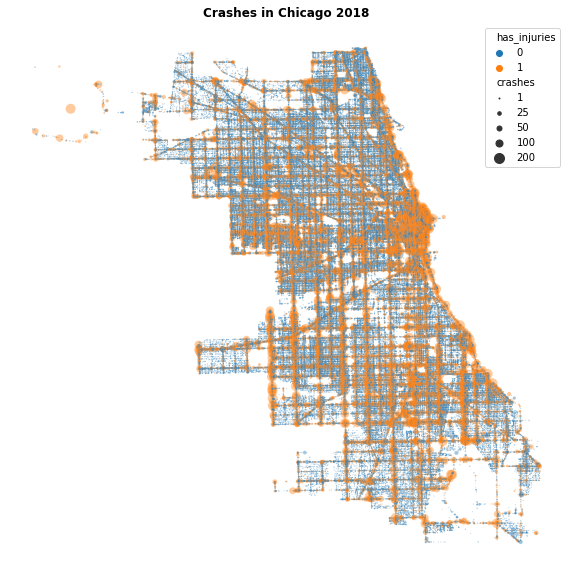

In [20]:
plt.subplots(figsize=(10,10))
fg = sns.scatterplot(data=crash_df_, x='LONGITUDE',y='LATITUDE',
                hue='has_injuries', sizes={1:1,25:12.5,50:25,100:50,200:100}, size_norm=(1,100), size='crashes', alpha=.4)
fg.set_axis_off()
fg.set_title('Crashes in Chicago 2018',fontweight='bold');

In [21]:
#df_crashes_drop.fillna('UNKOWN', inplace=True)
#df_crashes_drop.isna().sum()

In [22]:
df_crashes_drop.replace({'UNKNOWN':np.nan}, inplace=True)

In [23]:
df_vehicles = pd.read_csv('data/Traffic_Crashes_-_Vehicles.csv')
df_vehicles.head()


<ipython-input-23-fce9fee1d033>:1: DtypeWarning: Columns (19,21,40,41,42,44,48,49,50,53,55,58,59,61,71) have mixed types. Specify dtype option on import or set low_memory=False.
  df_vehicles = pd.read_csv('data/Traffic_Crashes_-_Vehicles.csv')


,CRASH_UNIT_ID,CRASH_RECORD_ID,RD_NO,CRASH_DATE,UNIT_NO,UNIT_TYPE,NUM_PASSENGERS,VEHICLE_ID,CMRC_VEH_I,MAKE,...,TRAILER1_LENGTH,TRAILER2_LENGTH,TOTAL_VEHICLE_LENGTH,AXLE_CNT,VEHICLE_CONFIG,CARGO_BODY_TYPE,LOAD_TYPE,HAZMAT_OUT_OF_SERVICE_I,MCS_OUT_OF_SERVICE_I,HAZMAT_CLASS
0,829999,24ddf9fd8542199d832e1c223cc474e5601b356f1d77a6...,JD124535,01/22/2020 06:25:00 AM,1,DRIVER,NaN,796949.0,NaN,INFINITI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,749947,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,09/28/2019 03:30:00 AM,1,DRIVER,NaN,834816.0,NaN,HONDA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,749949,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,09/28/2019 03:30:00 AM,2,PARKED,NaN,834819.0,NaN,TOYOTA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,749950,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,09/28/2019 03:30:00 AM,3,PARKED,NaN,834817.0,NaN,GENERAL MOTORS CORPORATION (GMC),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,871921,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,JD208731,04/13/2020 10:50:00 PM,2,DRIVER,NaN,827212.0,NaN,BUICK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
df_vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1335230 entries, 0 to 1335229
Data columns (total 72 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   CRASH_UNIT_ID             1335230 non-null  int64  
 1   CRASH_RECORD_ID           1335230 non-null  object 
 2   RD_NO                     1325924 non-null  object 
 3   CRASH_DATE                1335230 non-null  object 
 4   UNIT_NO                   1335230 non-null  int64  
 5   UNIT_TYPE                 1333361 non-null  object 
 6   NUM_PASSENGERS            198353 non-null   float64
 7   VEHICLE_ID                1304967 non-null  float64
 8   CMRC_VEH_I                24927 non-null    object 
 9   MAKE                      1304962 non-null  object 
 10  MODEL                     1304818 non-null  object 
 11  LIC_PLATE_STATE           1187047 non-null  object 
 12  VEHICLE_YEAR              1092432 non-null  float64
 13  VEHICLE_DEFECT            1

In [25]:
# filling all missing values with UNKNOWN string, so we can encode later
#df_vehicles_w_occ.fillna('UNKOWN', inplace=True)
#df_vehicles_w_occ.isna().sum()


In [26]:
# Keeping Relevant Features
df_vehicles_drop = df_vehicles [[
    'CRASH_RECORD_ID',
#    'RD_NO',
#    'CRASH_DATE',
    'VEHICLE_ID',
#    'MAKE',
#    'MODEL',
#    'LIC_PLATE_STATE',
    'VEHICLE_YEAR',
#    'VEHICLE_DEFECT',
#    'VEHICLE_TYPE',
#    'VEHICLE_USE',
#    'TRAVEL_DIRECTION',
    'OCCUPANT_CNT',
#    'VEHICLE_CONFIG',
]]
print(df_vehicles_drop.shape)

(1335230, 4)


In [27]:
df_vehicles.VEHICLE_CONFIG.value_counts()

TRACTOR/SEMI-TRAILER                   4572
SINGLE UNIT TRUCK, 2 AXLES, 6 TIRES    2337
BUS                                    1805
TRUCK/TRACTOR                           944
TRUCK/TRAILER                           770
UNKNOWN HEAVY TRUCK                     673
SINGLE UNIT TRUCK, 3 OR MORE AXLES      516
TRACTOR/DOUBLES                          32
Name: VEHICLE_CONFIG, dtype: int64

In [28]:
df_vehicles_drop.describe()

,VEHICLE_ID,VEHICLE_YEAR,OCCUPANT_CNT
count,1.304967e+06,1.092432e+06,1.304967e+06
mean,6.789888e+05,2.013626e+03,1.079589e+00
std,3.917114e+05,1.439261e+02,7.843770e-01
min,2.000000e+00,1.900000e+03,0.000000e+00
25%,3.400725e+05,2.006000e+03,1.000000e+00
50%,6.794450e+05,2.012000e+03,1.000000e+00
75%,1.017828e+06,2.016000e+03,1.000000e+00
max,1.358762e+06,9.999000e+03,9.900000e+01


In [29]:
# Dropping rows with vehicle year bigger than 2022 and below 1970
df_vehicles_drop1 = df_vehicles_drop[(df_vehicles_drop['VEHICLE_YEAR'] >= 1970) & (df_vehicles_drop['VEHICLE_YEAR'] <= 2022) | (df_vehicles_drop['VEHICLE_YEAR'].isna())]

In [30]:
df_vehicles_drop1.shape

(1333732, 4)

In [31]:
pd.set_option('display.max_rows', 100)
df_vehicles_drop1.isna().sum()

CRASH_RECORD_ID         0
VEHICLE_ID          30263
VEHICLE_YEAR       242798
OCCUPANT_CNT        30263
dtype: int64

In [32]:
pd.set_option('display.max_rows', 100)
df_vehicles_drop1.head(50)

,CRASH_RECORD_ID,VEHICLE_ID,VEHICLE_YEAR,OCCUPANT_CNT
0,24ddf9fd8542199d832e1c223cc474e5601b356f1d77a6...,796949.0,2017.0,1.0
1,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,834816.0,2016.0,1.0
2,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,834819.0,2010.0,0.0
3,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,834817.0,2008.0,0.0
4,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,827212.0,NaN,1.0
5,80f5b6eff349a72094c9c7a11745549caa8bd39b57cedd...,453462.0,2010.0,0.0
6,ecf9e646f89a73ed3df0f373e4fbd18e91f5a595004019...,792247.0,2014.0,1.0
7,ecf9e646f89a73ed3df0f373e4fbd18e91f5a595004019...,792252.0,2018.0,2.0
8,c7c57a49274b3aa953d0b76346f68e116ed8c3d72a683a...,794648.0,NaN,1.0
9,c7c57a49274b3aa953d0b76346f68e116ed8c3d72a683a...,794653.0,2014.0,0.0


In [33]:
# Dropping Vehicles with 0 Occupant (Parked Cars)
df_vehicles_w_occ = df_vehicles_drop1[df_vehicles_drop.OCCUPANT_CNT != 0.0]
print(df_vehicles_w_occ.shape)

(1160416, 4)


<ipython-input-33-a0910bced00f>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_vehicles_w_occ = df_vehicles_drop1[df_vehicles_drop.OCCUPANT_CNT != 0.0]


In [34]:
df_vehicles_w_occ.isna().sum()

CRASH_RECORD_ID         0
VEHICLE_ID          30263
VEHICLE_YEAR       231819
OCCUPANT_CNT        30263
dtype: int64

In [35]:
# Replacing all UNKNOWN values to missing values
df_vehicles_w_occ.replace({'UNKNOWN':np.nan}, inplace=True)

<ipython-input-35-fdbee41cc7b6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vehicles_w_occ.replace({'UNKNOWN':np.nan}, inplace=True)


In [36]:
df_vehicles_w_occ.isna().sum()

CRASH_RECORD_ID         0
VEHICLE_ID          30263
VEHICLE_YEAR       231819
OCCUPANT_CNT        30263
dtype: int64

In [37]:
df_people = pd.read_csv('data/Traffic_Crashes_-_PEOPLE.csv')
df_people.head()


<ipython-input-37-78bd59adc723>:1: DtypeWarning: Columns (20,24,25,26,29) have mixed types. Specify dtype option on import or set low_memory=False.
  df_people = pd.read_csv('data/Traffic_Crashes_-_PEOPLE.csv')


,PERSON_ID,PERSON_TYPE,CRASH_RECORD_ID,RD_NO,VEHICLE_ID,CRASH_DATE,SEAT_NO,CITY,STATE,ZIPCODE,...,EMS_RUN_NO,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_ACTION,PEDPEDAL_VISIBILITY,PEDPEDAL_LOCATION,BAC_RESULT,BAC_RESULT VALUE,CELL_PHONE_USE
0,O749947,DRIVER,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,834816.0,09/28/2019 03:30:00 AM,NaN,CHICAGO,IL,60651,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
1,O871921,DRIVER,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,JD208731,827212.0,04/13/2020 10:50:00 PM,NaN,CHICAGO,IL,60620,...,NaN,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
2,O10018,DRIVER,71162af7bf22799b776547132ebf134b5b438dcf3dac6b...,HY484534,9579.0,11/01/2015 05:00:00 AM,NaN,NaN,NaN,NaN,...,NaN,IMPROPER BACKING,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
3,O10038,DRIVER,c21c476e2ccc41af550b5d858d22aaac4ffc88745a1700...,HY484750,9598.0,11/01/2015 08:00:00 AM,NaN,NaN,NaN,NaN,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
4,O10039,DRIVER,eb390a4c8e114c69488f5fb8a097fe629f5a92fd528cf4...,HY484778,9600.0,11/01/2015 10:15:00 AM,NaN,NaN,NaN,NaN,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN


In [38]:
pd.set_option('display.max_rows', 100)
df_people.isna().sum()

PERSON_ID                      0
PERSON_TYPE                    0
CRASH_RECORD_ID                0
RD_NO                      10002
VEHICLE_ID                 28251
CRASH_DATE                     0
SEAT_NO                  1145710
CITY                      386612
STATE                     372988
ZIPCODE                   477431
SEX                        22243
AGE                       417101
DRIVERS_LICENSE_STATE     592164
DRIVERS_LICENSE_CLASS     719487
SAFETY_EQUIPMENT            4087
AIRBAG_DEPLOYED            27110
EJECTION                   17338
INJURY_CLASSIFICATION        632
HOSPITAL                 1186950
EMS_AGENCY               1281208
EMS_RUN_NO               1411946
DRIVER_ACTION             294521
DRIVER_VISION             294925
PHYSICAL_CONDITION        293716
PEDPEDAL_ACTION          1410885
PEDPEDAL_VISIBILITY      1410940
PEDPEDAL_LOCATION        1410889
BAC_RESULT                293506
BAC_RESULT VALUE         1435858
CELL_PHONE_USE           1436454
dtype: int

In [39]:
# Keeping Relevant Features
df_people_drop = df_people [[
    'CRASH_RECORD_ID',
#    'RD_NO',
#    'PERSON_ID',
    'PERSON_TYPE',
    'VEHICLE_ID',
#    'CITY',
#    'STATE',
    'ZIPCODE',
    'SEX',
    'AGE',
#    'DRIVERS_LICENSE_STATE',
#    'DRIVERS_LICENSE_CLASS',
    'SAFETY_EQUIPMENT',
    'AIRBAG_DEPLOYED',
#    'EJECTION',
#    'INJURY_CLASSIFICATION',
#    'DRIVER_VISION',
#    'DRIVER_ACTION',
#    'PHYSICAL_CONDITION',
#    'PEDPEDAL_ACTION',
#    'PEDPEDAL_VISIBILITY',
#    'PEDPEDAL_LOCATION',
#    'BAC_RESULT',
#    'BAC_RESULT VALUE',
#    'CELL_PHONE_USE',
]]
print(df_people_drop.shape)

(1437611, 8)


In [40]:
# Filtering the data with Drivers only
df_people_driver = df_people_drop[df_people_drop.PERSON_TYPE == 'DRIVER']
print(df_people_driver.shape)

(1117947, 8)


In [41]:
df_people_driver.isna().sum()

CRASH_RECORD_ID          0
PERSON_TYPE              0
VEHICLE_ID             632
ZIPCODE             325989
SEX                     97
AGE                 299295
SAFETY_EQUIPMENT         0
AIRBAG_DEPLOYED          0
dtype: int64

In [42]:
pd.set_option('display.max_columns', 100)
df_people_driver.head(20)

,CRASH_RECORD_ID,PERSON_TYPE,VEHICLE_ID,ZIPCODE,SEX,AGE,SAFETY_EQUIPMENT,AIRBAG_DEPLOYED
0,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,DRIVER,834816.0,60651,M,25.0,NONE PRESENT,DEPLOYMENT UNKNOWN
1,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,DRIVER,827212.0,60620,M,37.0,SAFETY BELT USED,DID NOT DEPLOY
2,71162af7bf22799b776547132ebf134b5b438dcf3dac6b...,DRIVER,9579.0,NaN,X,NaN,USAGE UNKNOWN,DEPLOYMENT UNKNOWN
3,c21c476e2ccc41af550b5d858d22aaac4ffc88745a1700...,DRIVER,9598.0,NaN,X,NaN,USAGE UNKNOWN,DEPLOYMENT UNKNOWN
4,eb390a4c8e114c69488f5fb8a097fe629f5a92fd528cf4...,DRIVER,9600.0,NaN,X,NaN,USAGE UNKNOWN,DEPLOYMENT UNKNOWN
5,dd1bce4bd6d0be4c247714dcabab44e6563c62b913229b...,DRIVER,9601.0,NaN,X,NaN,USAGE UNKNOWN,DEPLOYMENT UNKNOWN
6,4bd2ee6bb306902b99a9c2ae55cf4fcffec00879e39759...,DRIVER,9621.0,NaN,X,NaN,USAGE UNKNOWN,DEPLOYMENT UNKNOWN
7,9c03b6fcc6d72cf3ee2cb9ea754ea7e4617ab965142552...,DRIVER,9623.0,NaN,X,NaN,USAGE UNKNOWN,DEPLOYMENT UNKNOWN
8,2e7e0c1682100a200a46c25a532eda4febb00a2ae49ea9...,DRIVER,958.0,NaN,X,NaN,USAGE UNKNOWN,DEPLOYMENT UNKNOWN
9,8bf8069b3d839b732fd35d2c9d8caddeddbb4b8978e84d...,DRIVER,9645.0,NaN,X,NaN,USAGE UNKNOWN,DEPLOYMENT UNKNOWN


In [43]:
df_people_driver.describe()

,VEHICLE_ID,AGE
count,1.117315e+06,818652.000000
mean,6.738542e+05,40.013475
std,3.924537e+05,15.836726
min,2.000000e+00,-177.000000
25%,3.338875e+05,27.000000
50%,6.705940e+05,37.000000
75%,1.014066e+06,51.000000
max,1.358762e+06,110.000000


In [44]:
# Dropping rows with driver age bigger than 90 and below 18
df_people_driver_age = df_people_driver[(df_people_driver['AGE'] >= 18) & (df_people_driver['AGE'] <= 90) | (df_people_driver['AGE'].isna())]

In [45]:
# Replacing all UNKNOWN values to missing values
#Unknown = ['UNKNOWN','USAGE UNKNOWN', 'DEPLOYMENT UNKNOWN']
df_vehicles_w_occ.replace({'Unknown' :np.nan , 'USAGE UNKNOWN' :np.nan , 'DEPLOYMENT UNKNOWN':np.nan }, inplace=True)

<ipython-input-45-fad22d175994>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vehicles_w_occ.replace({'Unknown' :np.nan , 'USAGE UNKNOWN' :np.nan , 'DEPLOYMENT UNKNOWN':np.nan }, inplace=True)


In [46]:
merged = df_crashes_drop.merge(df_vehicles_w_occ, on='CRASH_RECORD_ID')
print(merged.shape)

(1160337, 18)


In [47]:
df = merged.merge(df_people_driver_age, on=['VEHICLE_ID','CRASH_RECORD_ID'])
print(df.shape)

(1099817, 24)


In [48]:
df.head()

,CRASH_RECORD_ID,CRASH_DATE,POSTED_SPEED_LIMIT,WEATHER_CONDITION,ROADWAY_SURFACE_COND,ROAD_DEFECT,INJURIES_TOTAL,INJURIES_FATAL,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,has_injuries,has_fatality,VEHICLE_ID,VEHICLE_YEAR,OCCUPANT_CNT,PERSON_TYPE,ZIPCODE,SEX,AGE,SAFETY_EQUIPMENT,AIRBAG_DEPLOYED
0,062f5a6f6b87b762165d4da04d6d3a181385776a10b051...,08/31/2022 10:13:00 PM,30,CLEAR,DRY,NO DEFECTS,2.0,0.0,22,4,8,41.959389,-87.747348,1,0,1340131.0,NaN,1.0,DRIVER,NaN,X,NaN,USAGE UNKNOWN,DEPLOYMENT UNKNOWN
1,062f5a6f6b87b762165d4da04d6d3a181385776a10b051...,08/31/2022 10:13:00 PM,30,CLEAR,DRY,NO DEFECTS,2.0,0.0,22,4,8,41.959389,-87.747348,1,0,1340137.0,1994.0,2.0,DRIVER,60201,M,67.0,USAGE UNKNOWN,"DEPLOYED, COMBINATION"
2,0115ade9a755e835255508463f7e9c4a9a0b47e9304238...,07/15/2022 12:45:00 AM,30,CLEAR,DRY,NaN,0.0,0.0,0,6,7,41.886336,-87.716203,0,0,1310014.0,NaN,1.0,DRIVER,NaN,X,NaN,USAGE UNKNOWN,DEPLOYMENT UNKNOWN
3,0115ade9a755e835255508463f7e9c4a9a0b47e9304238...,07/15/2022 12:45:00 AM,30,CLEAR,DRY,NaN,0.0,0.0,0,6,7,41.886336,-87.716203,0,0,1310017.0,2015.0,1.0,DRIVER,60649,M,62.0,USAGE UNKNOWN,NOT APPLICABLE
4,017040c61958d2fa977c956b2bd2d6759ef7754496dc96...,07/15/2022 06:50:00 PM,30,CLEAR,DRY,NO DEFECTS,0.0,0.0,18,6,7,41.925111,-87.667997,0,0,1313322.0,2017.0,1.0,DRIVER,60644,F,58.0,USAGE UNKNOWN,DID NOT DEPLOY


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1099817 entries, 0 to 1099816
Data columns (total 24 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   CRASH_RECORD_ID       1099817 non-null  object 
 1   CRASH_DATE            1099817 non-null  object 
 2   POSTED_SPEED_LIMIT    1099817 non-null  int64  
 3   WEATHER_CONDITION     1055149 non-null  object 
 4   ROADWAY_SURFACE_COND  1025920 non-null  object 
 5   ROAD_DEFECT           926974 non-null   object 
 6   INJURIES_TOTAL        1099817 non-null  float64
 7   INJURIES_FATAL        1099817 non-null  float64
 8   CRASH_HOUR            1099817 non-null  int64  
 9   CRASH_DAY_OF_WEEK     1099817 non-null  int64  
 10  CRASH_MONTH           1099817 non-null  int64  
 11  LATITUDE              1092714 non-null  float64
 12  LONGITUDE             1092714 non-null  float64
 13  has_injuries          1099817 non-null  int64  
 14  has_fatality          1099817 non-

In [50]:
# creating bins for times 
# 0-6 = Late Night/Early Morning 
# 6-12 = Morning 
# 12-18 = Afternoon/Rush Hour
# 18-23 = Late Evening 
df['time_bins'] = pd.cut(x=df['CRASH_HOUR'], bins = [0,6,12,18,23], 
                         labels = ['Late Night/Early Morning', 
                        'Morning', 'Afternoon/Rush Hour','Late Evening'])
df.head()

,CRASH_RECORD_ID,CRASH_DATE,POSTED_SPEED_LIMIT,WEATHER_CONDITION,ROADWAY_SURFACE_COND,ROAD_DEFECT,INJURIES_TOTAL,INJURIES_FATAL,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,has_injuries,has_fatality,VEHICLE_ID,VEHICLE_YEAR,OCCUPANT_CNT,PERSON_TYPE,ZIPCODE,SEX,AGE,SAFETY_EQUIPMENT,AIRBAG_DEPLOYED,time_bins
0,062f5a6f6b87b762165d4da04d6d3a181385776a10b051...,08/31/2022 10:13:00 PM,30,CLEAR,DRY,NO DEFECTS,2.0,0.0,22,4,8,41.959389,-87.747348,1,0,1340131.0,NaN,1.0,DRIVER,NaN,X,NaN,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,Late Evening
1,062f5a6f6b87b762165d4da04d6d3a181385776a10b051...,08/31/2022 10:13:00 PM,30,CLEAR,DRY,NO DEFECTS,2.0,0.0,22,4,8,41.959389,-87.747348,1,0,1340137.0,1994.0,2.0,DRIVER,60201,M,67.0,USAGE UNKNOWN,"DEPLOYED, COMBINATION",Late Evening
2,0115ade9a755e835255508463f7e9c4a9a0b47e9304238...,07/15/2022 12:45:00 AM,30,CLEAR,DRY,NaN,0.0,0.0,0,6,7,41.886336,-87.716203,0,0,1310014.0,NaN,1.0,DRIVER,NaN,X,NaN,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,NaN
3,0115ade9a755e835255508463f7e9c4a9a0b47e9304238...,07/15/2022 12:45:00 AM,30,CLEAR,DRY,NaN,0.0,0.0,0,6,7,41.886336,-87.716203,0,0,1310017.0,2015.0,1.0,DRIVER,60649,M,62.0,USAGE UNKNOWN,NOT APPLICABLE,NaN
4,017040c61958d2fa977c956b2bd2d6759ef7754496dc96...,07/15/2022 06:50:00 PM,30,CLEAR,DRY,NO DEFECTS,0.0,0.0,18,6,7,41.925111,-87.667997,0,0,1313322.0,2017.0,1.0,DRIVER,60644,F,58.0,USAGE UNKNOWN,DID NOT DEPLOY,Afternoon/Rush Hour


In [51]:
# Dropping Unnecassary Features
df_relv = df.drop([
    'CRASH_RECORD_ID',
#    'RD_NO',
#    'PERSON_ID',
    'CRASH_DATE',
    'VEHICLE_ID',
#    'CITY',
#    'STATE',
#    'ZIPCODE',
    'PERSON_TYPE',
    'OCCUPANT_CNT',
    'has_injuries',
    'has_fatality',
#    'LONGITUDE',
#    'LATITUDE',
    'ROAD_DEFECT',
#    'LIC_PLATE_STATE',
#    'TRAVEL_DIRECTION', 
#    'DRIVERS_LICENSE_STATE',
#    'INJURY_CLASSIFICATION',
#    'DRIVER_ACTION',
#    'PHYSICAL_CONDITION'],
],axis=1)

In [52]:
df_drop_missing = df_relv.dropna(subset = ['ZIPCODE','LATITUDE','LONGITUDE'], axis = 0)
df_drop_missing.shape

(770645, 17)

In [53]:
df_drop_missing.head(100)

,POSTED_SPEED_LIMIT,WEATHER_CONDITION,ROADWAY_SURFACE_COND,INJURIES_TOTAL,INJURIES_FATAL,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,VEHICLE_YEAR,ZIPCODE,SEX,AGE,SAFETY_EQUIPMENT,AIRBAG_DEPLOYED,time_bins
1,30,CLEAR,DRY,2.0,0.0,22,4,8,41.959389,-87.747348,1994.0,60201,M,67.0,USAGE UNKNOWN,"DEPLOYED, COMBINATION",Late Evening
3,30,CLEAR,DRY,0.0,0.0,0,6,7,41.886336,-87.716203,2015.0,60649,M,62.0,USAGE UNKNOWN,NOT APPLICABLE,NaN
4,30,CLEAR,DRY,0.0,0.0,18,6,7,41.925111,-87.667997,2017.0,60644,F,58.0,USAGE UNKNOWN,DID NOT DEPLOY,Afternoon/Rush Hour
5,30,CLEAR,DRY,0.0,0.0,18,6,7,41.925111,-87.667997,2019.0,60622,M,49.0,USAGE UNKNOWN,DID NOT DEPLOY,Afternoon/Rush Hour
7,40,CLOUDY/OVERCAST,DRY,0.0,0.0,17,6,7,41.975826,-87.650420,2013.0,60660,F,63.0,SAFETY BELT USED,NOT APPLICABLE,Afternoon/Rush Hour
10,30,RAIN,WET,0.0,0.0,8,6,7,41.944199,-87.747157,2018.0,60140,M,19.0,SAFETY BELT USED,NOT APPLICABLE,Morning
11,30,RAIN,WET,0.0,0.0,8,6,7,41.944199,-87.747157,2020.0,60102,M,58.0,SAFETY BELT USED,NOT APPLICABLE,Morning
14,30,CLEAR,DRY,0.0,0.0,11,4,8,41.730216,-87.548387,NaN,60652,M,56.0,SAFETY BELT USED,DID NOT DEPLOY,Morning
17,35,RAIN,WET,0.0,0.0,11,6,7,41.807856,-87.733435,2019.0,60565,M,37.0,SAFETY BELT USED,DID NOT DEPLOY,Morning
18,35,RAIN,WET,0.0,0.0,11,6,7,41.807856,-87.733435,2014.0,60090,M,40.0,SAFETY BELT USED,DID NOT DEPLOY,Morning


In [59]:
df11 = df_drop_missing[['LATITUDE',"LONGITUDE"]][:500].reset_index(drop=True)
df11.isna().sum()

LATITUDE     0
LONGITUDE    0
dtype: int64

In [60]:
df11

,LATITUDE,LONGITUDE
0,41.959389,-87.747348
1,41.886336,-87.716203
2,41.925111,-87.667997
3,41.925111,-87.667997
4,41.975826,-87.650420
...,...,...
495,41.831243,-87.616941
496,41.831243,-87.616941
497,41.831243,-87.616941
498,41.938535,-87.806913


In [56]:
len(df11)

100

from uszipcode import SearchEngine
engine = SearchEngine()
zipcodes = engine.by_coordinates(41.959389, -87.747348, radius=1)
for zipcode in zipcodes:
    print(zipcode.zipcode)

In [107]:
zipcodes[0]

SimpleZipcode(zipcode='60641', zipcode_type='STANDARD', major_city='Chicago', post_office_city='Chicago, IL', common_city_list=['Chicago'], county='Cook County', state='IL', lat=41.95, lng=-87.75, timezone='America/Chicago', radius_in_miles=2.0, area_code_list='773', population=71663, population_density=17730.0, land_area_in_sqmi=4.04, water_area_in_sqmi=0.0, housing_units=27072, occupied_housing_units=24770, median_home_value=265000, median_household_income=46816, bounds_west=-87.767123, bounds_east=-87.72583, bounds_north=41.962531, bounds_south=41.93131)

In [61]:
def get_zipcode(df11, geolocator):
    location = geolocator.reverse((df11['LATITUDE'], df11['LONGITUDE']))
    return location.raw['address']['postcode']


geolocator = geopy.Nominatim(user_agent='miladghasemi@hotmail.com')


zipcodes = df11.apply(get_zipcode, axis=1, geolocator=geolocator)


KeyError: 'postcode'

In [58]:
zipcodes

0     60641
1     60624
2     60614
3     60614
4     60640
5     60641
6     60641
7     60617
8     60638
9     60638
10    60601
11    60611
12    60611
13    60623
14    60623
15    60608
16    60612
17    60613
18    60613
19    60302
20    60302
21    60625
22    60622
23    60622
24    60622
25    60651
26    60617
27    60302
28    60302
29    60302
30    60637
31    60637
32    60637
33    60637
34    60647
35    60647
36    60647
37    60647
38    60647
39    60652
40    60652
41    60611
42    60617
43    60617
44    60617
45    60629
46    60629
47    60660
48    60644
49    60644
50    60616
51    60616
52    60623
53    60619
54    60619
55    60623
56    60619
57    60619
58    60619
59    60619
60    60619
61    60619
62    60619
63    60619
64    60619
65    60619
66    60623
67    60623
68    60607
69    60639
70    60631
71    60631
72    60620
73    60620
74    60609
75    60609
76    60302
77    60302
78    60632
79    60632
80    60656
81    60656
82    60610
83  

In [ ]:
pd.set_option('display.max_rows', 100)
df_drop_missing.ZIPCODE.value_counts()

In [ ]:
df_drop_missing.ZIPCODE.nunique()

In [ ]:
df_drop_missing.isna().sum()

In [ ]:
# Splitting features into numeric and categorical
numeric_columns = [
    'POSTED_SPEED_LIMIT',
#    'NUM_UNITS',
    'VEHICLE_YEAR',
#    'OCCUPANT_CNT',
    'AGE',
    
]

cat_columns = [
    'WEATHER_CONDITION', 
    'ROADWAY_SURFACE_COND',  
#    'ROAD_DEFECT',  
    'CRASH_HOUR',  
    'CRASH_DAY_OF_WEEK',  
    'CRASH_MONTH',   
    'ZIPCODE',  
    'SEX',  
    'SAFETY_EQUIPMENT', 
    'AIRBAG_DEPLOYED',  
    'time_bins',
]


Target1 = df_drop_missing[[
    'INJURIES_TOTAL',           
#    'INJURIES_FATAL',    
]]

Target2 = df_drop_missing[[
#    'INJURIES_TOTAL',           
    'INJURIES_FATAL',    
]]

numeric_df = df_drop_missing[numeric_columns]
cat_df = df_drop_missing[cat_columns]

# Train_Test Split

In [ ]:
X = pd.concat([numeric_df,cat_df] , axis = 1)
y = Target1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 42)

X_train_nums = X_train [[
    'POSTED_SPEED_LIMIT',
    'VEHICLE_YEAR',
    'AGE',
    
]]

X_train_cats = X_train [[  
    'WEATHER_CONDITION', 
    'ROADWAY_SURFACE_COND',  
#    'ROAD_DEFECT',  
    'CRASH_HOUR',  
    'CRASH_DAY_OF_WEEK',  
    'CRASH_MONTH',   
    'ZIPCODE',  
    'SEX',  
    'SAFETY_EQUIPMENT', 
    'AIRBAG_DEPLOYED',  
    'time_bins',
]]

X_train = pd.concat([X_train_nums,X_train_cats] , axis = 1)

In [ ]:
imputer = SimpleImputer(strategy="most_frequent", verbose = True) 
X_train_filled = imputer.fit_transform(X_train_cats)

In [ ]:
XX = pd.DataFrame(X_train_filled)

# Impute and Scale Data Using Pipeline

In [ ]:
#numerical_imputer_pipeline = Pipeline(steps=[
#    ('ImN', SimpleImputer(strategy="median"))
#])    
#categorical_imputer_pipeline = Pipeline(steps=[
#    ('ImC', SimpleImputer(strategy="most_frequent"))  
#])
numerical_pipeline = Pipeline(steps=[
    ('ImN', SimpleImputer(strategy="median")),
    ('ss', StandardScaler())
])
                
categorical_pipeline = Pipeline(steps=[
    ('ImC', SimpleImputer(strategy="most_frequent")),
#    ('ohe', OneHotEncoder(drop='first',
#                         sparse=False))
])

trans = ColumnTransformer(transformers=[
#    ('numerical_I', numerical_pipeline, X_train_nums.columns),
#    ('categorical_I', categorical_imputer_pipeline, X_train_cats.columns),
    ('numerical', numerical_pipeline, X_train_nums.columns),
    ('categorical', categorical_pipeline, X_train_cats.columns)
])

In [ ]:
prep_pipe = Pipeline(steps=[
    ('trans', trans)
])

In [ ]:
prep_pipe.fit(X_train)

In [ ]:
def get_zipcode(df, geolocator, lat_field, lon_field):
    location = geolocator.reverse((df[lat_field], df[lon_field]))
    return location.raw['address']['postcode']


geolocator = geopy.Nominatim(user_agent='http')

df8 = pd.DataFrame({
    'Lat': [29.39291, 29.39923, 29.40147, 29.38752, 29.39291, 29.39537, 29.39343, 29.39291, 29.39556],
    'Lon': [-98.50925, -98.51256, -98.51123, -98.52372, -98.50925, -98.50402, -98.49707, -98.50925, -98.53148]
})
zipcodes = df.apply(get_zipcode, axis=1, geolocator=geolocator, lat_field='Lat', lon_field='Lon')

In [ ]:
zipcodes

In [ ]:
df8